In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [2]:
corr_thresh=0.18

In [3]:
#load the correlation results
df_modules=pd.read_csv('/Users/fsfatemi/local_AD/Correlation_results/module_correlations_leiden_all.csv')
df_modules=df_modules.sort_values('correlation',ascending=False)
df_modules['cluster_l']=df_modules['cluster'].apply(lambda x: ast.literal_eval(x))

#get the clusters with correlations more than 0.18 (this 0.18 is arbitrary and can be changed)
top_genes=df_modules[df_modules['correlation']>0.18]['cluster_l']

In [5]:
df_modules[df_modules['correlation']>0.18]

,cluster,cluster size,resolution,network,method,correlation,cluster_l
39678,"['ENSG00000110090.13', 'ENSG00000162885.14', '...",15,20.0,knn_10_pos,leiden_unweighted,0.219818,"[ENSG00000110090.13, ENSG00000162885.14, ENSG0..."
60802,"['ENSG00000110090.13', 'ENSG00000162885.14', '...",15,20.0,knn_10,leiden_unweighted,0.219818,"[ENSG00000110090.13, ENSG00000162885.14, ENSG0..."
97346,"['ENSG00000213809.9', 'ENSG00000184984.10', 'E...",24,100.0,knn_5_pos,leiden_weighted,0.218614,"[ENSG00000213809.9, ENSG00000184984.10, ENSG00..."
32179,"['ENSG00000151502.11', 'ENSG00000156973.14', '...",26,50.0,knn_7_pos,leiden_unweighted,0.215693,"[ENSG00000151502.11, ENSG00000156973.14, ENSG0..."
9011,"['ENSG00000049449.10', 'ENSG00000136770.11', '...",150,5.0,knn_4,leiden_unweighted,0.214472,"[ENSG00000049449.10, ENSG00000136770.11, ENSG0..."
...,...,...,...,...,...,...,...
101075,"['ENSG00000105254.12', 'ENSG00000141161.12', '...",24,50.0,knn_4_pos,leiden_unweighted,0.180438,"[ENSG00000105254.12, ENSG00000141161.12, ENSG0..."
66456,"['ENSG00000164574.16', 'ENSG00000154118.13', '...",14,100.0,knn_11,leiden_weighted,0.180384,"[ENSG00000164574.16, ENSG00000154118.13, ENSG0..."
45330,"['ENSG00000164574.16', 'ENSG00000154118.13', '...",14,100.0,knn_11_pos,leiden_weighted,0.180384,"[ENSG00000164574.16, ENSG00000154118.13, ENSG0..."
86868,"['ENSG00000049449.10', 'ENSG00000171522.6', 'E...",83,20.0,knn_12_pos,leiden_unweighted,0.180073,"[ENSG00000049449.10, ENSG00000171522.6, ENSG00..."


In [9]:
#get the merged list of all genes in the top clusters
unique_gene_list = list(set(item for sublist in top_genes for item in sublist))
len(unique_gene_list)

1503

In [10]:
#load the annotation file
annotation_df=pd.read_csv('/Users/fsfatemi/local_AD/KBASE_datashare/Normalization/gene_annotation.cqn_tbl_total.24736_1140.csv')
annotation_df.head()

,Geneid,gc,len,gc_col,Chr,gene_type,gene_name
0,ENSG00000000419.14,0.395752,9276,n.s,chr20,protein_coding,DPM1
1,ENSG00000000457.14,0.413773,6883,n.s,chr1,protein_coding,SCYL3
2,ENSG00000000460.17,0.429816,5970,n.s,chr1,protein_coding,C1orf112
3,ENSG00000000938.13,0.570668,3382,n.s,chr1,protein_coding,FGR
4,ENSG00000000971.17,0.369406,15284,n.s,chr1,protein_coding,CFH


In [15]:
#covert gene ids to gene names
list_gene_names=[]
for g in unique_gene_list:
    gene_name=annotation_df[annotation_df['Geneid']==g]['gene_name'].iloc[0]
    if gene_name not in list_gene_names: list_gene_names.append(gene_name)

len(list_gene_names)


1503

In [18]:
#run the GO enrichment analysis
import gseapy as gp

In [20]:
enrichr_results = gp.enrichr(
gene_list=list_gene_names,                        
gene_sets="KEGG_2019_Human",    
organism="Human",                          
outdir=f"enrichr_results/clusters_with_corr_thresh_{corr_thresh}_number_of_genes_{len(list_gene_names)}",                  
)

In [ ]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import seaborn as sns

# Extract k
df_modules['k'] = df_modules['network'].str.extract(r'knn_(\d+)', expand=False).astype(int)


In [37]:

# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 4) 
                    & (df_modules['resolution'] == 0.1) 
                    & (df_modules['network']=='knn_4')
                    & (df_modules['method']=='leiden_weighted')].copy()
subset

,cluster,cluster size,resolution,network,method,correlation,cluster_l,k
8702,"['ENSG00000256660.7', 'ENSG00000172322.14', 'E...",4,0.1,knn_4,leiden_weighted,0.099437,"[ENSG00000256660.7, ENSG00000172322.14, ENSG00...",4
8694,"['ENSG00000000971.17', 'ENSG00000001460.18', '...",7578,0.1,knn_4,leiden_weighted,0.057398,"[ENSG00000000971.17, ENSG00000001460.18, ENSG0...",4
8700,"['ENSG00000111215.12', 'ENSG00000212128.2', 'E...",16,0.1,knn_4,leiden_weighted,0.034514,"[ENSG00000111215.12, ENSG00000212128.2, ENSG00...",4
8706,"['ENSG00000187080.10', 'ENSG00000197454.2', 'E...",4,0.1,knn_4,leiden_weighted,0.030484,"[ENSG00000187080.10, ENSG00000197454.2, ENSG00...",4
8697,"['ENSG00000185271.9', 'ENSG00000196220.17', 'E...",188,0.1,knn_4,leiden_weighted,0.000241,"[ENSG00000185271.9, ENSG00000196220.17, ENSG00...",4
8693,"['ENSG00000000419.14', 'ENSG00000000457.14', '...",4217,0.1,knn_4,leiden_weighted,-0.008206,"[ENSG00000000419.14, ENSG00000000457.14, ENSG0...",4
8704,"['ENSG00000170667.16', 'ENSG00000168255.20', '...",6,0.1,knn_4,leiden_weighted,-0.008659,"[ENSG00000170667.16, ENSG00000168255.20, ENSG0...",4
8701,"['ENSG00000163293.12', 'ENSG00000198515.16', '...",4,0.1,knn_4,leiden_weighted,-0.013353,"[ENSG00000163293.12, ENSG00000198515.16, ENSG0...",4
8705,"['ENSG00000228696.11', 'ENSG00000185829.19', '...",4,0.1,knn_4,leiden_weighted,-0.034407,"[ENSG00000228696.11, ENSG00000185829.19, ENSG0...",4
8703,"['ENSG00000240184.7', 'ENSG00000167914.12', 'E...",11,0.1,knn_4,leiden_weighted,-0.038203,"[ENSG00000240184.7, ENSG00000167914.12, ENSG00...",4


In [38]:

# Reset index and assign module labels
subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=0.1'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)


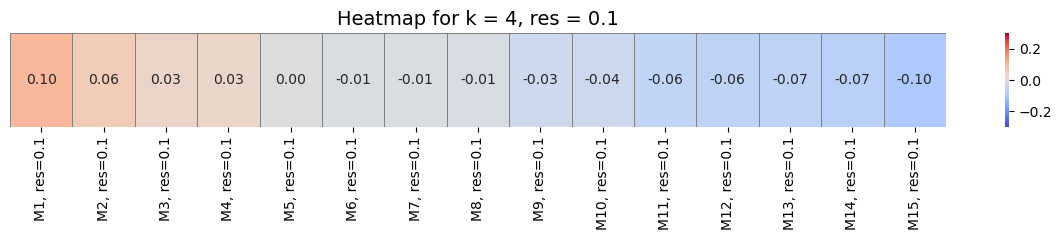

In [39]:

# Plot
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            annot=True,
            fmt=".2f")

plt.title('Heatmap for k = 4, res = 0.1', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()


In [40]:
# Filter for k = 4 and resolution = 0.1
subset = df_modules[(df_modules['k'] == 10) 
                    & (df_modules['resolution'] == 20) 
                    & (df_modules['network']=='knn_10')
                    & (df_modules['method']=='leiden_unweighted')].copy()

subset

,cluster,cluster size,resolution,network,method,correlation,cluster_l,k
60802,"['ENSG00000110090.13', 'ENSG00000162885.14', '...",15,20.0,knn_10,leiden_unweighted,0.219818,"[ENSG00000110090.13, ENSG00000162885.14, ENSG0...",10
60709,"['ENSG00000049449.10', 'ENSG00000115392.13', '...",52,20.0,knn_10,leiden_unweighted,0.196426,"[ENSG00000049449.10, ENSG00000115392.13, ENSG0...",10
60687,"['ENSG00000221829.11', 'ENSG00000160318.6', 'E...",123,20.0,knn_10,leiden_unweighted,0.182298,"[ENSG00000221829.11, ENSG00000160318.6, ENSG00...",10
60732,"['ENSG00000041802.11', 'ENSG00000189144.15', '...",24,20.0,knn_10,leiden_unweighted,0.137056,"[ENSG00000041802.11, ENSG00000189144.15, ENSG0...",10
60613,"['ENSG00000168824.15', 'ENSG00000171517.6', 'E...",43,20.0,knn_10,leiden_unweighted,0.134657,"[ENSG00000168824.15, ENSG00000171517.6, ENSG00...",10
...,...,...,...,...,...,...,...,...
60644,"['ENSG00000116478.12', 'ENSG00000127804.13', '...",88,20.0,knn_10,leiden_unweighted,-0.121615,"[ENSG00000116478.12, ENSG00000127804.13, ENSG0...",10
60797,"['ENSG00000104856.15', 'ENSG00000049541.11', '...",52,20.0,knn_10,leiden_unweighted,-0.124595,"[ENSG00000104856.15, ENSG00000049541.11, ENSG0...",10
60747,"['ENSG00000255154.9', 'ENSG00000128567.17', 'E...",25,20.0,knn_10,leiden_unweighted,-0.130169,"[ENSG00000255154.9, ENSG00000128567.17, ENSG00...",10
60695,"['ENSG00000107882.12', 'ENSG00000088832.18', '...",50,20.0,knn_10,leiden_unweighted,-0.131328,"[ENSG00000107882.12, ENSG00000088832.18, ENSG0...",10


In [45]:

subset = subset.reset_index(drop=True)
subset['module_name'] = ['M' + str(i + 1) for i in range(len(subset))]
subset['module_label'] = subset['module_name'] + ', res=20'

# Create DataFrame for heatmap
plot_df = pd.DataFrame([subset['correlation'].values], columns=subset['module_label'].values)

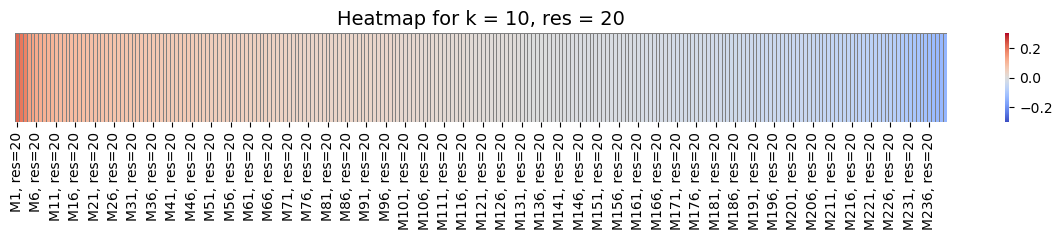

In [46]:
plt.figure(figsize=(12, 2.5))
sns.heatmap(plot_df,
            cmap='coolwarm',
            cbar=True,
            vmin=-0.3, vmax=0.3,
            linewidths=0.5,
            linecolor='gray',
            #annot=True,
            #fmt=".2f")
)

plt.title('Heatmap for k = 10, res = 20', fontsize=14)
plt.yticks([])  # Hide y-axis ticks
plt.xticks(rotation=90)
plt.xlabel('')
plt.tight_layout()
plt.show()